# Исследовательский анализ

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import yaml

import seaborn as sns
pd.set_option("display.max_rows", 30)
pd.set_option("display.max_columns", 20)
pd.set_option("display.precision",6)
pd.set_option("plotting.backend", "matplotlib")

#Для корректного отображения графиков в ноутбуках используется команда %matplotlib inline
%matplotlib inline
# для корректного отображения графиков на тёмном фоне
plt.style.use('default')

# Загрузка и анализ сырых данных

In [2]:
project_path = os.path.abspath(os.path.join(os.getcwd(), os.path.pardir, os.path.pardir))
f_input = os.path.join("data", "raw", "SF_Mandarin_dataset_ver3_csv.csv")
filename = os.path.join(project_path,f_input)

In [3]:
df = pd.read_csv(filename, sep=';')

Размер набора данных

In [4]:
print(f'Строк - {df.shape[0]}\nСтолбцов - {df.shape[1]}')

Строк - 8787
Столбцов - 22


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8787 entries, 0 to 8786
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SkillFactory_Id    6603 non-null   float64
 1   BirthDate          6603 non-null   object 
 2   education          6603 non-null   object 
 3   employment status  6603 non-null   object 
 4   Value              6523 non-null   object 
 5   JobStartDate       6494 non-null   object 
 6   Position           6494 non-null   object 
 7   MonthProfit        6603 non-null   float64
 8   MonthExpense       6603 non-null   float64
 9   Gender             6566 non-null   float64
 10  Family status      6566 non-null   object 
 11  ChildCount         6566 non-null   float64
 12  SNILS              6603 non-null   float64
 13  BankA_decision     6603 non-null   object 
 14  BankB_decision     6603 non-null   object 
 15  BankC_decision     6603 non-null   object 
 16  BankD_decision     6603 

In [6]:
df.describe()

,SkillFactory_Id,MonthProfit,MonthExpense,Gender,ChildCount,SNILS,Merch_code,Loan_amount,Loan_term
count,6603.000000,6.603000e+03,6603.000000,6566.000000,6566.000000,6603.000000,6603.000000,6603.000000,6603.000000
mean,4388.192640,1.484528e+05,26234.063153,0.309625,0.097320,0.350295,38.794184,76362.108133,12.117219
std,2515.520596,7.742496e+04,22557.993167,0.462374,0.423026,0.477099,23.929860,50978.500496,5.996582
min,1.000000,5.000000e+01,0.000000,0.000000,0.000000,0.000000,1.000000,4000.000000,6.000000
25%,2225.500000,1.000000e+05,15000.000000,0.000000,0.000000,0.000000,18.000000,35000.000000,6.000000
50%,4431.000000,1.450000e+05,22500.000000,0.000000,0.000000,0.000000,36.000000,68000.000000,12.000000
75%,6516.500000,1.900000e+05,31000.000000,1.000000,0.000000,1.000000,63.000000,101000.000000,18.000000
max,8787.000000,1.200000e+06,500000.000000,1.000000,5.000000,1.000000,80.000000,200000.000000,24.000000


In [7]:
# Количество дубликатов:
df.duplicated().sum()

2183

In [8]:
# Строк с пустыми значениями
df[df.isnull().any(axis=1)].shape[0]

2323

In [9]:
df.isna().sum()

SkillFactory_Id      2184
BirthDate            2184
education            2184
employment status    2184
Value                2264
                     ... 
BankE_decision       2184
Merch_code           2184
Loan_amount          2184
Loan_term            2184
Goods_category       2184
Length: 22, dtype: int64

# Загрузка и анализ данных после предобработки

## Данные после 1-го этапа заполнения пропусков

In [4]:
# f_input = os.path.join("data", "raw", "SF_Mandarin_dataset_ver3_csv.csv")
f_input1="data/stage_fill_na/dataset.csv"
filename = os.path.join(project_path,f_input1)
df1 = pd.read_csv(filename, sep=';')

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6603 entries, 0 to 6602
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SkillFactory_Id    6603 non-null   float64
 1   BirthDate          6603 non-null   object 
 2   education          6603 non-null   object 
 3   employment status  6603 non-null   object 
 4   Value              6603 non-null   object 
 5   JobStartDate       6494 non-null   object 
 6   Position           6494 non-null   object 
 7   MonthProfit        6603 non-null   float64
 8   MonthExpense       6603 non-null   float64
 9   Gender             6603 non-null   float64
 10  Family status      6603 non-null   object 
 11  ChildCount         6603 non-null   float64
 12  SNILS              6603 non-null   float64
 13  BankA_decision     6603 non-null   object 
 14  BankB_decision     6603 non-null   object 
 15  BankC_decision     6603 non-null   object 
 16  BankD_decision     6603 

## Данные после 2-го этапа корректировки типов данных

In [95]:
f_input2="data/stage_data_prepare/dataset.csv"
filename = os.path.join(project_path,f_input2)
df2 = pd.read_csv(filename, sep=';', parse_dates=['JobStartDate', 'BirthDate'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6603 entries, 0 to 6602
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   SkillFactory_Id    6603 non-null   float64       
 1   BirthDate          6603 non-null   datetime64[ns]
 2   education          6603 non-null   object        
 3   employment status  6603 non-null   object        
 4   Value              6603 non-null   object        
 5   JobStartDate       6494 non-null   datetime64[ns]
 6   Position           6494 non-null   object        
 7   MonthProfit        6603 non-null   float64       
 8   MonthExpense       6603 non-null   float64       
 9   Gender             6603 non-null   int64         
 10  Family status      6603 non-null   object        
 11  ChildCount         6603 non-null   int64         
 12  SNILS              6603 non-null   int64         
 13  BankA_decision     6603 non-null   object        
 14  BankB_de

In [12]:
# Количество дубликатов:
df2.duplicated().sum()

0

In [13]:
# Строк с пустыми значениями
df2[df2.isnull().any(axis=1)].shape[0]

109

In [6]:
f_input3="data/stage_fix_errors/dataset.csv"
filename = os.path.join(project_path,f_input3)
df3 = pd.read_csv(filename, sep=';', parse_dates=['JobStartDate', 'BirthDate'])
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6603 entries, 0 to 6602
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   SkillFactory_Id    6603 non-null   float64       
 1   BirthDate          6603 non-null   datetime64[ns]
 2   education          6603 non-null   object        
 3   employment status  6603 non-null   object        
 4   Value              6603 non-null   object        
 5   JobStartDate       6494 non-null   datetime64[ns]
 6   Position           6494 non-null   object        
 7   MonthProfit        6603 non-null   float64       
 8   MonthExpense       6603 non-null   float64       
 9   Gender             6603 non-null   int64         
 10  Family status      6603 non-null   object        
 11  ChildCount         6603 non-null   int64         
 12  SNILS              6603 non-null   int64         
 13  BankA_decision     6603 non-null   object        
 14  BankB_de

In [186]:
f_input4="data/stage_create_features/dataset.csv"
filename = os.path.join(project_path,f_input4)
df4 = pd.read_csv(filename, sep=';')
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6603 entries, 0 to 6602
Columns: 161 entries, образование to последний стаж код
dtypes: float64(4), int64(151), object(6)
memory usage: 8.1+ MB


# Предварительный анализ данных

In [5]:
from importlib import reload
from dateutil.relativedelta import relativedelta
from datetime import datetime

import data_prepare
# import utils.seniority_cats
from scripts.data_scripts.utils import seniority_cats
import fix_errors
import create_features

reload(data_prepare)
reload(seniority_cats)
reload(fix_errors)
reload(create_features)

<module 'create_features' from '/mnt/data/projects/active/urfu/hacaton2/scripts/data_scripts/create_features.py'>

In [96]:
df2p = data_prepare.prepare_dataset(df2)
df2p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6603 entries, 0 to 6602
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   SkillFactory_Id    6603 non-null   float64       
 1   BirthDate          6603 non-null   datetime64[ns]
 2   education          6603 non-null   object        
 3   employment status  6603 non-null   object        
 4   Value              6603 non-null   object        
 5   JobStartDate       6494 non-null   datetime64[ns]
 6   Position           6494 non-null   object        
 7   MonthProfit        6603 non-null   float64       
 8   MonthExpense       6603 non-null   float64       
 9   Gender             6603 non-null   int64         
 10  Family status      6603 non-null   object        
 11  ChildCount         6603 non-null   int64         
 12  SNILS              6603 non-null   int64         
 13  BankA_decision     6603 non-null   object        
 14  BankB_de

In [119]:
df2p.describe(include=['object','category'])

,education,employment status,Value,Position,Family status,BankA_decision,BankB_decision,BankC_decision,BankD_decision,BankE_decision,Goods_category
count,6603,6603,6603,6494,6603,6603,6603,6603,6603,6603,6603
unique,10,7,14,1131,5,3,3,3,3,3,7
top,Высшее - специалист,Работаю по найму полный рабочий день/служу,10 и более лет,ИНДИВИДУАЛЬНЫЙ ПРЕДПРИНИМАТЕЛЬ,Никогда в браке не состоял(а),success,success,success,success,success,Furniture
freq,5296,4858,3615,204,4474,4970,4894,4932,4953,4950,976


In [120]:
df2p.describe()

,SkillFactory_Id,BirthDate,JobStartDate,MonthProfit,MonthExpense,Gender,ChildCount,SNILS,Merch_code,Loan_amount,Loan_term
count,6603.000000,6603,6494,6.603000e+03,6603.000000,6603.000000,6603.000000,6603.000000,6603.000000,6603.000000,6603.000000
mean,4388.192640,1987-03-02 17:54:16.519763712,2015-10-18 09:56:29.344009984,1.484528e+05,26234.063153,0.307890,0.096774,0.350295,38.794184,76362.108133,12.117219
min,1.000000,1940-03-22 00:00:00,1973-09-01 00:00:00,5.000000e+01,0.000000,0.000000,0.000000,0.000000,1.000000,4000.000000,6.000000
25%,2225.500000,1979-01-12 00:00:00,2012-09-01 00:00:00,1.000000e+05,15000.000000,0.000000,0.000000,0.000000,18.000000,35000.000000,6.000000
50%,4431.000000,1988-03-08 00:00:00,2018-09-01 00:00:00,1.450000e+05,22500.000000,0.000000,0.000000,0.000000,36.000000,68000.000000,12.000000
75%,6516.500000,1998-01-09 00:00:00,2021-04-01 00:00:00,1.900000e+05,31000.000000,1.000000,0.000000,1.000000,63.000000,101000.000000,18.000000
max,8787.000000,2005-05-27 00:00:00,2023-06-01 00:00:00,1.200000e+06,500000.000000,1.000000,5.000000,1.000000,80.000000,200000.000000,24.000000
std,2515.520596,NaN,NaN,7.742496e+04,22557.993167,0.461656,0.421901,0.477099,23.929860,50978.500496,5.996582


Выводы:

## Анализ категориальных данных

In [109]:
# Уникальных значений
df2p['Gender'].value_counts()

Gender
0    4570
1    2033
Name: count, dtype: int64

In [110]:
# Уникальных значений
df2p['ChildCount'].value_counts()

ChildCount
0    6206
1     203
2     154
3      33
4       6
5       1
Name: count, dtype: int64

In [111]:
# Уникальных значений
df2p['SNILS'].value_counts()

SNILS
0    4290
1    2313
Name: count, dtype: int64

In [114]:
# Уникальных значений
df2p['Loan_amount'].value_counts()

Loan_amount
47000     69
27000     66
74000     66
9000      66
57000     66
          ..
173000     9
168000     9
155000     8
174000     8
128000     8
Name: count, Length: 197, dtype: int64

In [97]:
# Уникальных значений
df2p['Loan_term'].value_counts()

Loan_term
12    2490
6     2406
18     879
24     828
Name: count, dtype: int64

In [98]:
# Уникальных значений
df2p['education'].value_counts()

education
Высшее - специалист         5296
Среднее профессиональное     471
Среднее                      233
Неоконченное высшее          233
Бакалавр                     153
Несколько высших             110
Магистр                       73
Неоконченное среднее          30
MBA                            3
Ученая степень                 1
Name: count, dtype: int64

In [100]:
# Уникальных значений
df2p['employment status'].value_counts()

employment status
Работаю по найму полный рабочий день/служу    4858
Собственное дело                              1527
Не работаю                                      75
Работаю по найму неполный рабочий день          62
Студент                                         44
Декретный отпуск                                19
Пенсионер                                       18
Name: count, dtype: int64

In [101]:
# Уникальных значений
df2p['Value'].value_counts()

Value
10 и более лет       3615
3 - 4 года            528
2 - 3 года            503
4 - 5 лет             371
5 - 6 лет             293
1 - 2 года            279
6 - 7 лет             250
7 - 8 лет             225
8 - 9 лет             152
6 месяцев - 1 год     127
9 - 10 лет             88
Нет стажа              80
4 - 6 месяцев          56
менее 4 месяцев        36
Name: count, dtype: int64

In [102]:
# Уникальных значений
df2p['Family status'].value_counts()

Family status
Никогда в браке не состоял(а)               4474
Женат / замужем                             1490
Разведён / Разведена                         486
Гражданский брак / совместное проживание     104
Вдовец / вдова                                49
Name: count, dtype: int64

In [103]:
# Уникальных значений
df2p['Goods_category'].value_counts()

Goods_category
Furniture           976
Mobile_devices      957
Travel              956
Medical_services    940
Education           936
Fitness             928
Other               910
Name: count, dtype: int64

In [104]:
# Уникальных значений
df2p['Merch_code'].value_counts()

Merch_code
35.0    110
11.0    110
74.0    108
62.0    108
63.0    106
       ... 
19.0     84
36.0     83
6.0      82
72.0     79
66.0     79
Name: count, Length: 70, dtype: int64

In [105]:
# Уникальных значений
df2p['BankA_decision'].value_counts()

BankA_decision
success    4970
denied     1562
error        71
Name: count, dtype: int64

/tmp/ipykernel_1674864/138016214.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  myplot.set_xticklabels(myplot.get_xticklabels(), rotation=45,
/tmp/ipykernel_1674864/138016214.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  myplot.set_xticklabels(myplot.get_xticklabels(), rotation=45,
/tmp/ipykernel_1674864/138016214.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  myplot.set_xticklabels(myplot.get_xticklabels(), rotation=45,
/tmp/ipykernel_1674864/138016214.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  myplot.set_xticklabels(myplot.get_xticklabels(), rotation=45,
/tmp/ipykernel_1674864/138016214.py:5: UserWarning: set_ticklabels() should 

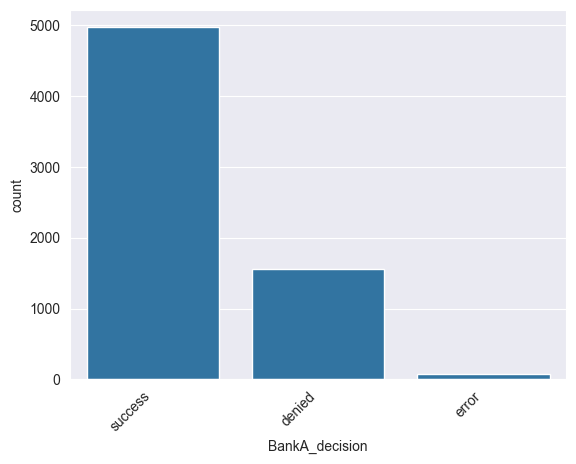

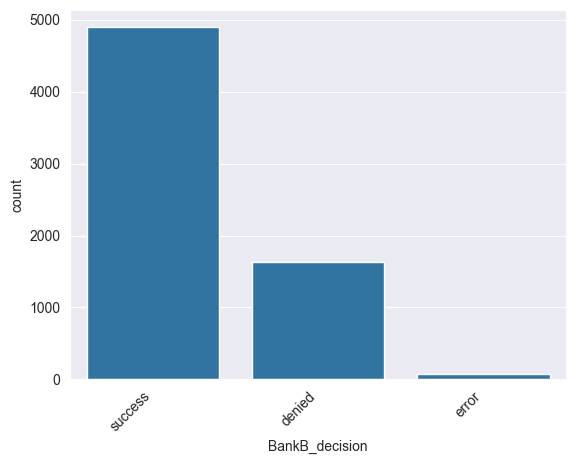

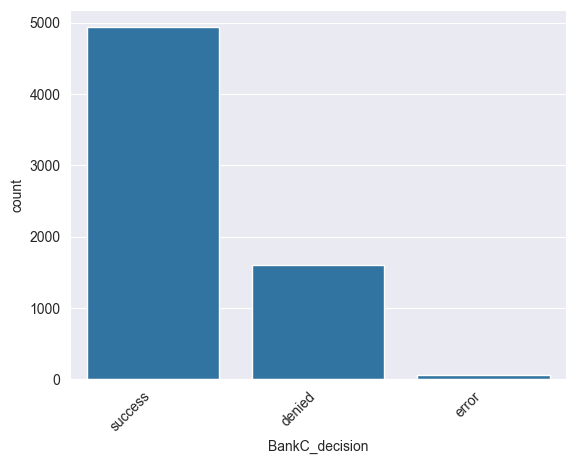

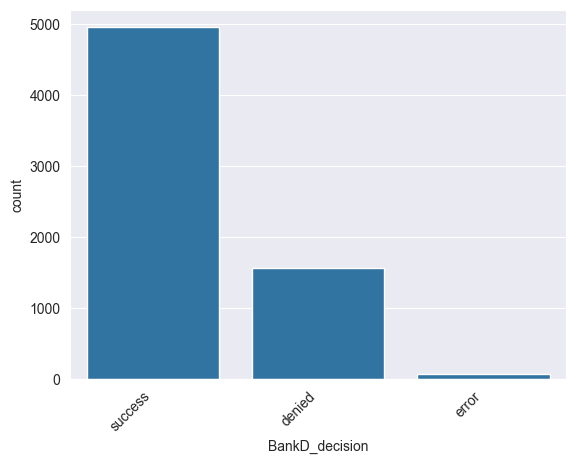

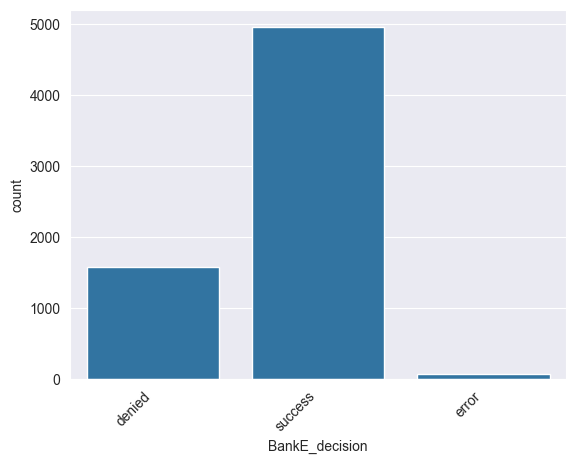

In [106]:
columns = [col for col in df2p.columns if 'Bank' in col]
for i in columns:
  plt.figure(i)
  myplot=sns.countplot(df2p, x=i)
  myplot.set_xticklabels(myplot.get_xticklabels(), rotation=45,
                        horizontalalignment='right')

Гистограмма


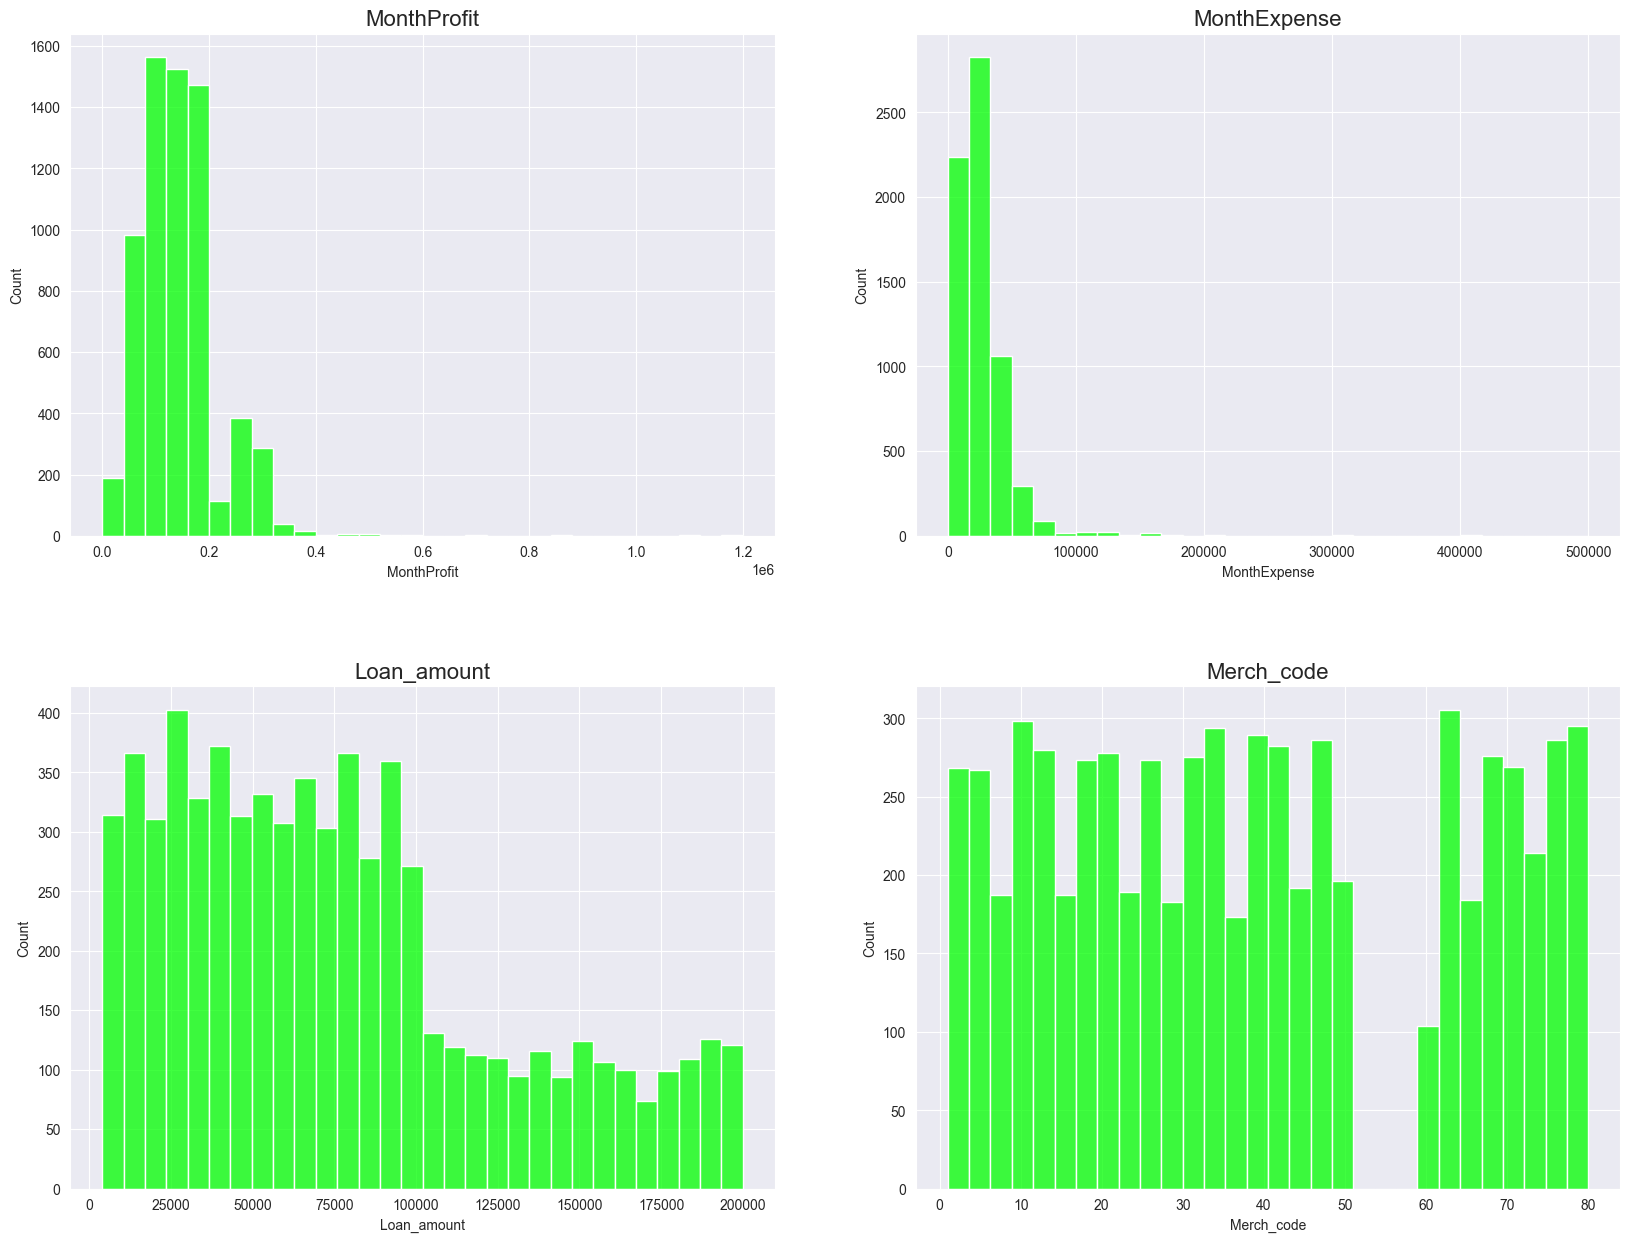

In [231]:
features = ["MonthProfit","MonthExpense" , "Loan_amount", "Merch_code"]
num=-1
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))
plt.subplots_adjust(hspace=.3)
print("Гистограмма")
for feature in features:
    num = num+1
    x=num//2
    y=num -2*x
    sns.histplot(data=df2p, x=feature, bins=30, color='lime', ax=axes[x,y]).set_title(feature, fontsize=16)

Диаграмма размаха


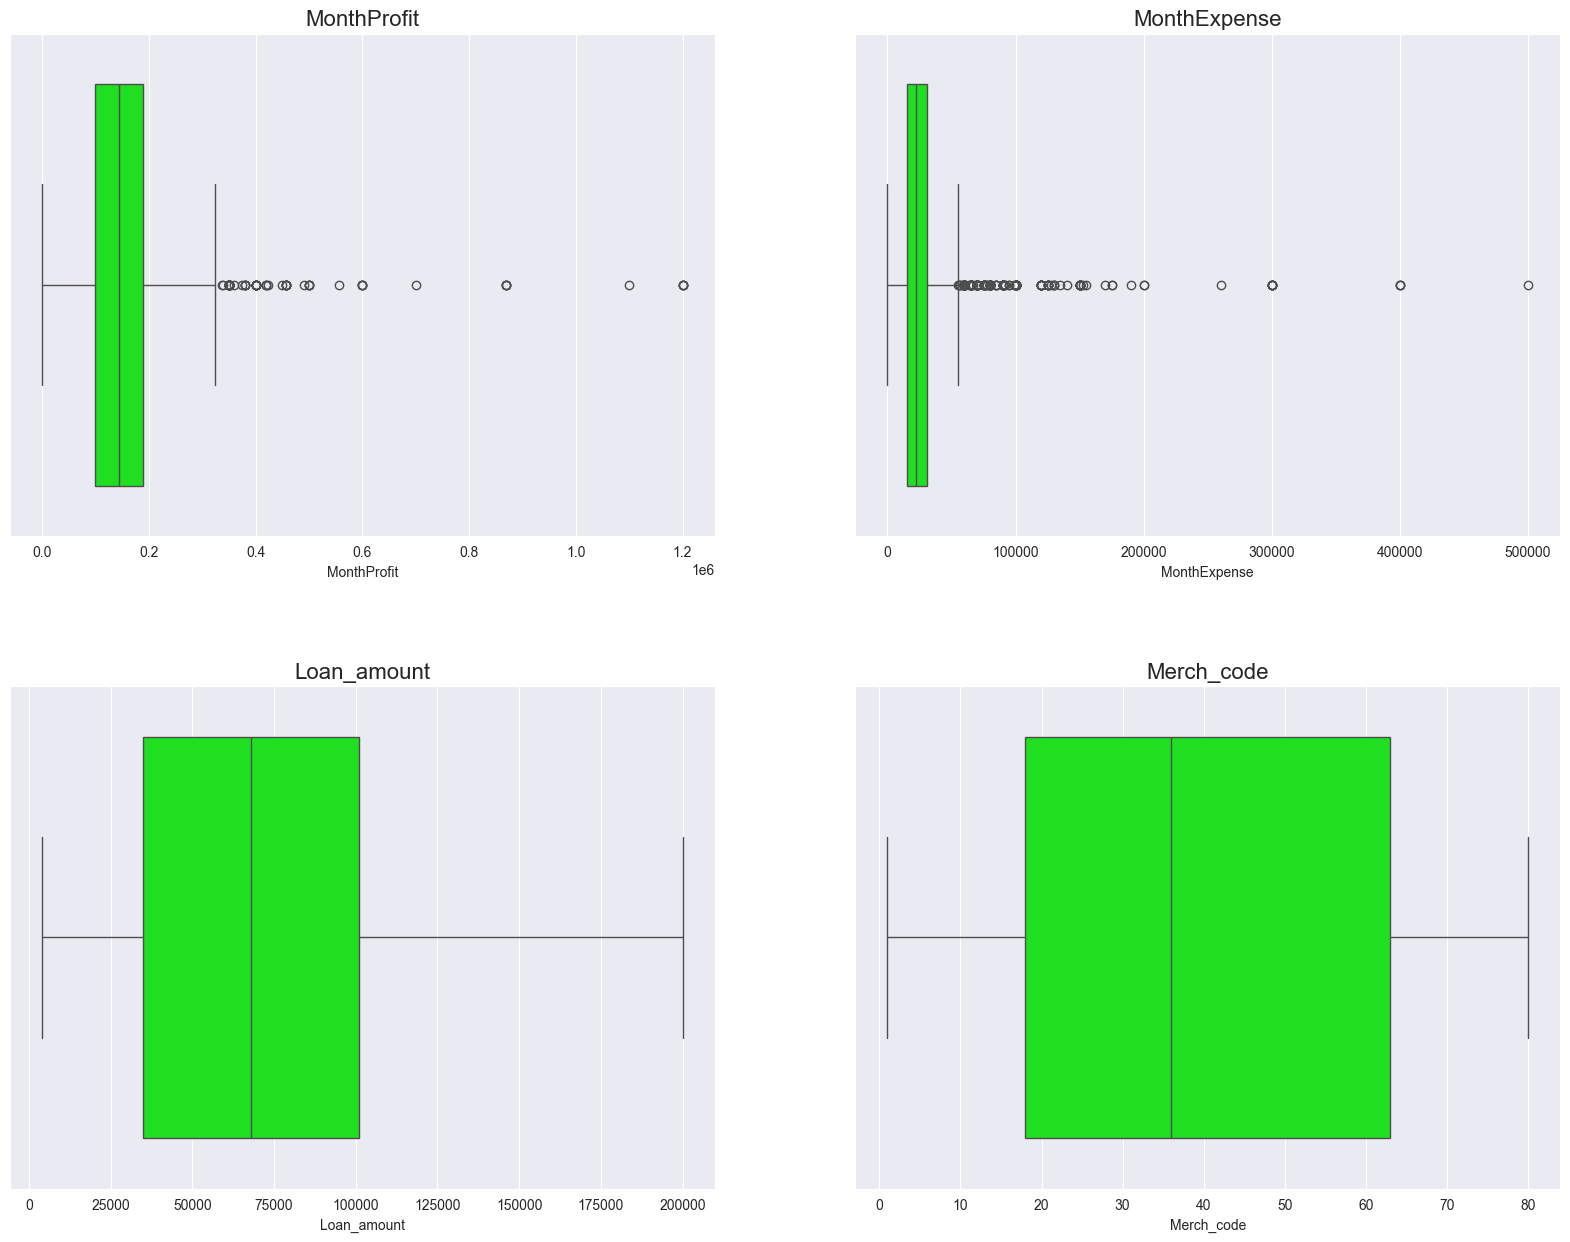

In [232]:
features = ["MonthProfit","MonthExpense" , "Loan_amount", "Merch_code"]
num=-1
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))
plt.subplots_adjust(hspace=.3)

print("Диаграмма размаха")
for feature in features:
    num = num+1
    x=num//2
    y=num -2*x
    sns.boxplot(data=df2p, x=feature, orient='h', color='lime', ax=axes[x,y]).set_title(feature, fontsize=16)

/tmp/ipykernel_1674864/4098037326.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  myplot.set_xticklabels(myplot.get_xticklabels(), rotation=45,
/tmp/ipykernel_1674864/4098037326.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  myplot.set_xticklabels(myplot.get_xticklabels(), rotation=45,
/tmp/ipykernel_1674864/4098037326.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  myplot.set_xticklabels(myplot.get_xticklabels(), rotation=45,
/tmp/ipykernel_1674864/4098037326.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  myplot.set_xticklabels(myplot.get_xticklabels(), rotation=45,
/tmp/ipykernel_1674864/4098037326.py:5: UserWarning: set_ticklabels() sh

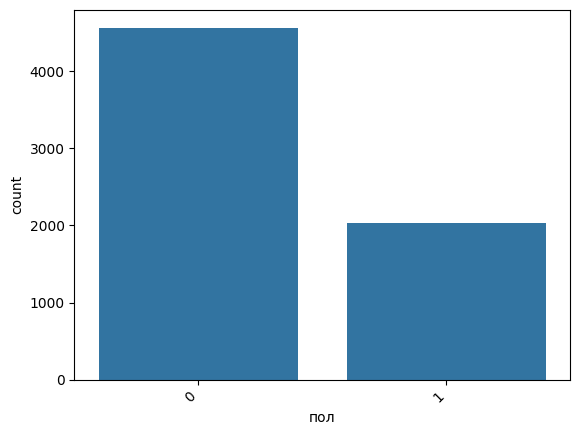

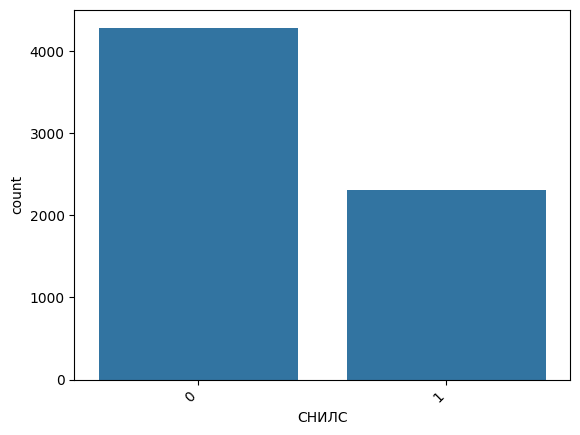

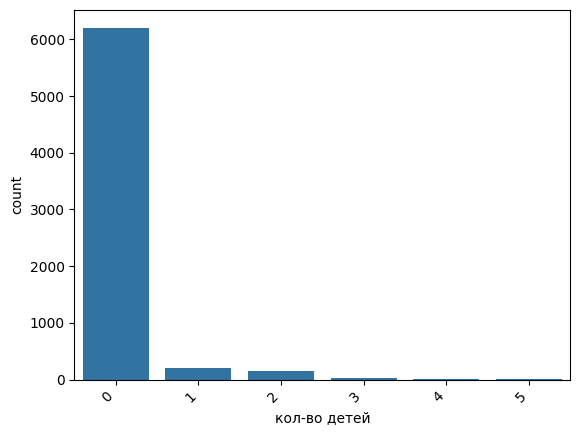

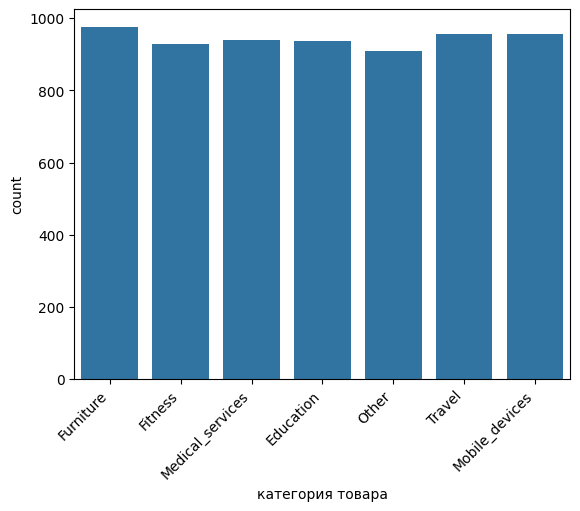

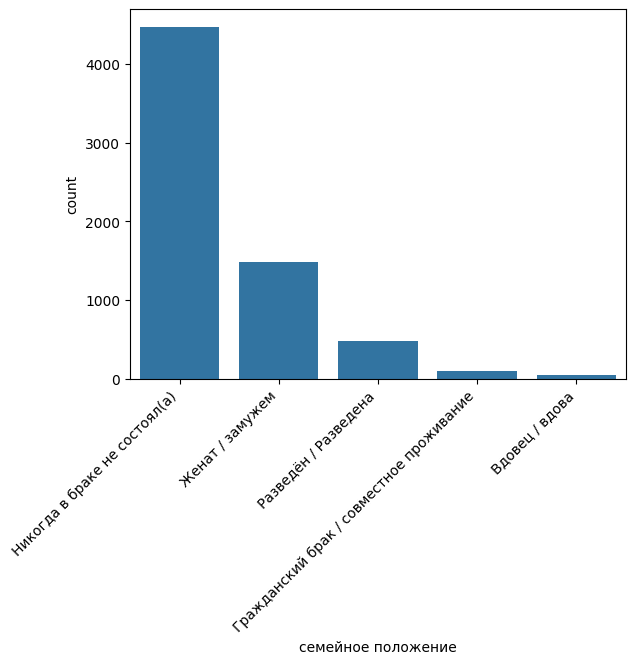

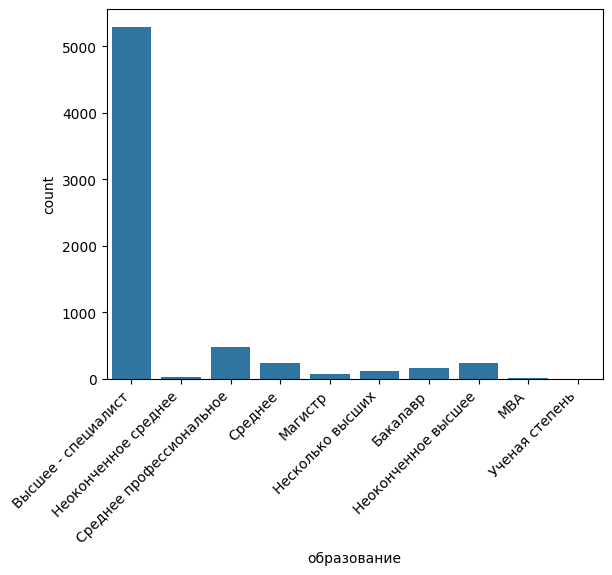

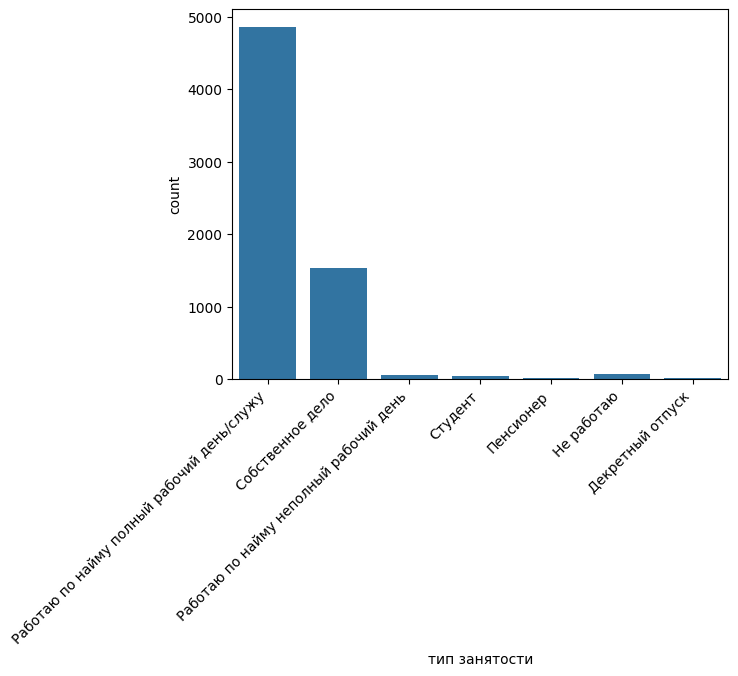

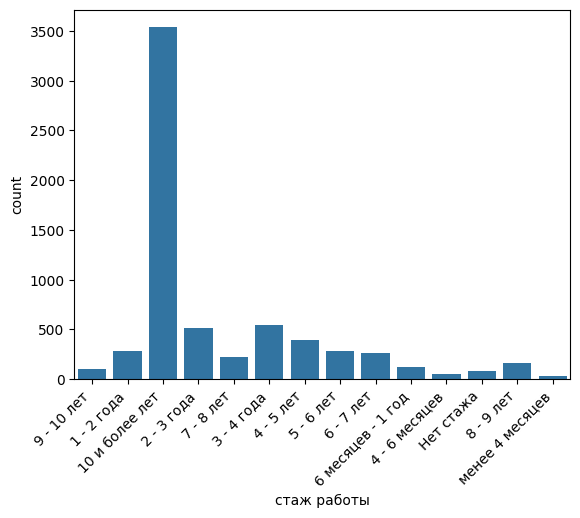

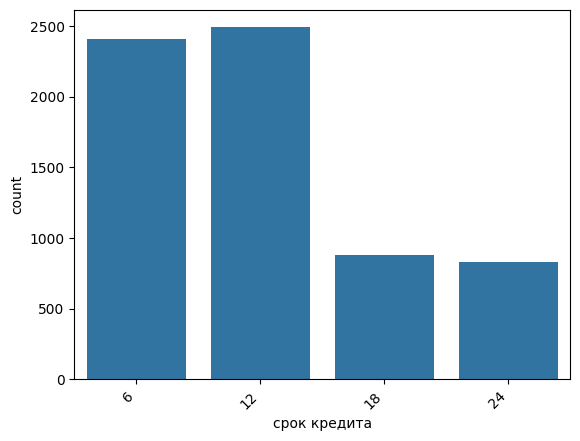

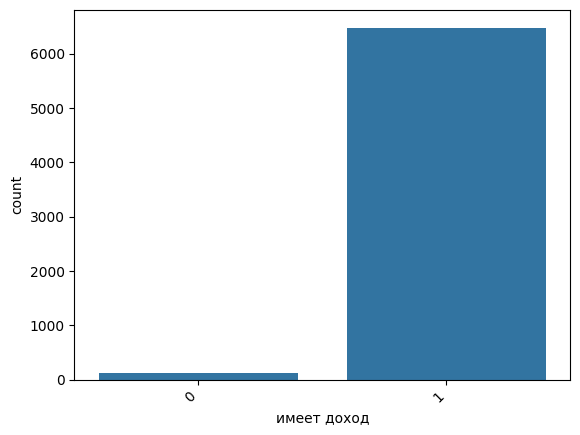

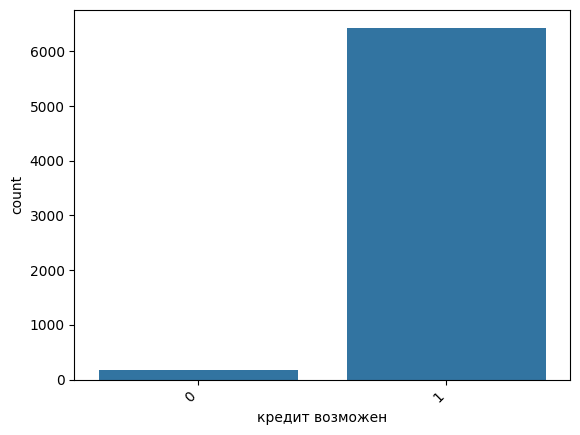

In [17]:
columns=df4[['пол', 'СНИЛС', 'кол-во детей', 'категория товара', 'семейное положение', 'образование', 'тип занятости', 'стаж работы', 'срок кредита', 'имеет доход','кредит возможен']]
for i in columns:
  plt.figure(i)
  myplot=sns.countplot(df4, x=i)
  myplot.set_xticklabels(myplot.get_xticklabels(), rotation=45,
                        horizontalalignment='right')

/tmp/ipykernel_1674864/2376959204.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  myplot.set_xticklabels(myplot.get_xticklabels(), rotation=45,
/tmp/ipykernel_1674864/2376959204.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  myplot.set_xticklabels(myplot.get_xticklabels(), rotation=45,
/tmp/ipykernel_1674864/2376959204.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  myplot.set_xticklabels(myplot.get_xticklabels(), rotation=45,
/tmp/ipykernel_1674864/2376959204.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  myplot.set_xticklabels(myplot.get_xticklabels(), rotation=45,
/tmp/ipykernel_1674864/2376959204.py:5: UserWarning: set_ticklabels() sh

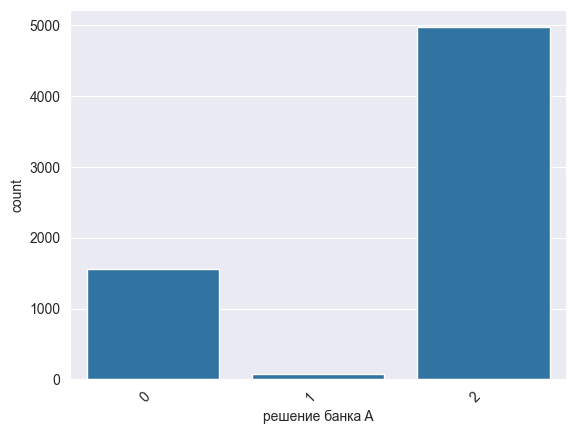

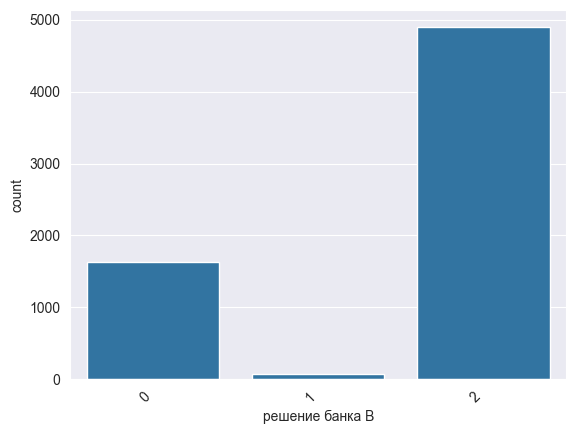

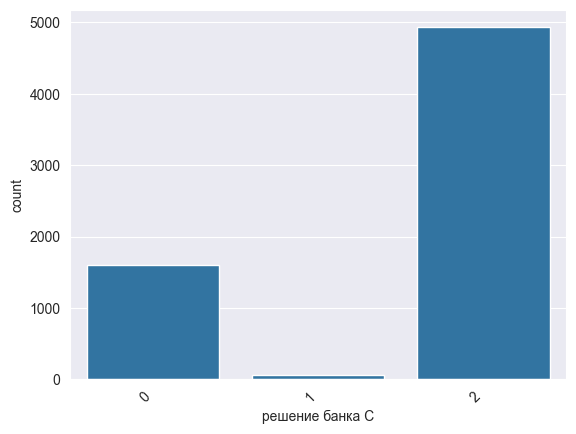

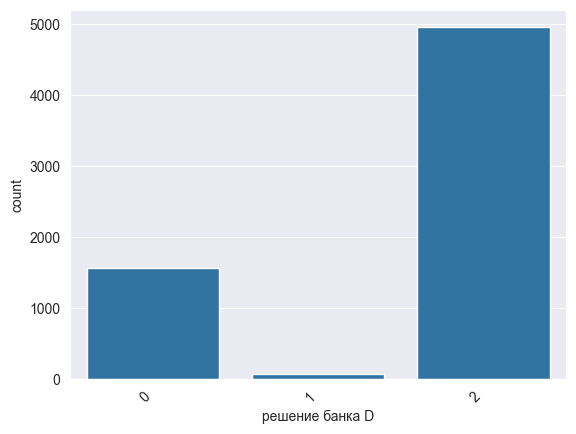

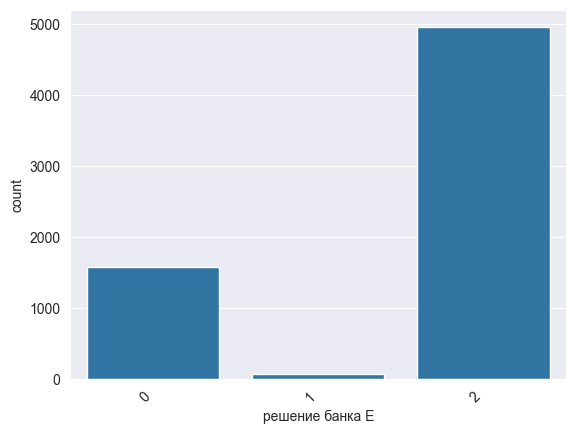

In [69]:
columns = [col for col in df4.columns if 'решение банка' in col]
for i in columns:
  plt.figure(i)
  myplot=sns.countplot(df4, x=i)
  myplot.set_xticklabels(myplot.get_xticklabels(), rotation=45,
                        horizontalalignment='right')

In [85]:
# ss=df4.groupby( 'категория товара')["решение банка A"].value_counts()
NA0=df4[df4["решение банка A"] == 0].shape[0]
NA1=df4[df4["решение банка A"] == 1].shape[0]
NA2=df4[df4["решение банка A"] == 2].shape[0]
print( NA0, NA1, NA2, NA2/NA0, NA2/len(df4))

1562 71 4970 3.1818181818181817 0.7526881720430108


In [86]:
NB0=df4[df4["решение банка B"] == 0].shape[0]
NB1=df4[df4["решение банка B"] == 1].shape[0]
NB2=df4[df4["решение банка B"] == 2].shape[0]
print( NB0, NB1, NB2, NB2/NB0, NB2/len(df4))

1634 75 4894 2.995104039167687 0.7411782523095563


In [87]:
NC0=df4[df4["решение банка C"] == 0].shape[0]
NC1=df4[df4["решение банка C"] == 1].shape[0]
NC2=df4[df4["решение банка C"] == 2].shape[0]
print( NC0, NC1, NC2, NC2/NC0, NC2/len(df4))

1609 62 4932 3.065257924176507 0.7469332121762835


In [88]:
ND0=df4[df4["решение банка D"] == 0].shape[0]
ND1=df4[df4["решение банка D"] == 1].shape[0]
ND2=df4[df4["решение банка D"] == 2].shape[0]
print( ND0, ND1, ND2, ND2/ND0,  ND2/len(df4))

1573 77 4953 3.1487603305785123 0.7501135847342117


In [89]:
NE0=df4[df4["решение банка E"] == 0].shape[0]
NE1=df4[df4["решение банка E"] == 1].shape[0]
NE2=df4[df4["решение банка E"] == 2].shape[0]
print( NE0, NE1, NE2, NE2/NE0, NE2/len(df4))

1581 72 4950 3.130929791271347 0.7496592457973649


In [90]:
(NE2+ND2+NA2+NB2+NC2)/5/len(df4)

0.7481144934120855

Вывод: для всех банков данные несбалансированы, класс 0 (отказ) имеет меньше данных в 0,75 раза, чем класс 2 (одобрение)

<Axes: xlabel='кредитная нагрузка', ylabel='Count'>

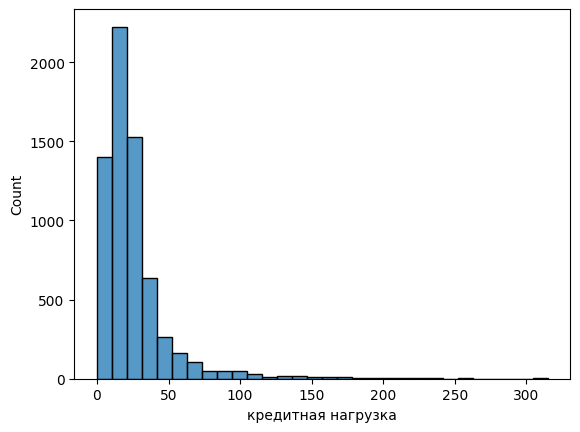

In [20]:
sns.histplot(data=df4, x="кредитная нагрузка", bins=30)

<Axes: xlabel='кредитная нагрузка', ylabel='Count'>

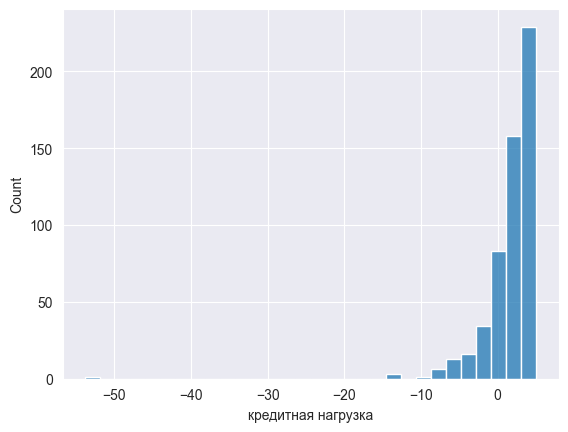

In [142]:
sns.histplot(data=df4[df4["кредитная нагрузка"]<5], x="кредитная нагрузка", bins=30)

<Axes: xlabel='ежемесячный доход', ylabel='Count'>

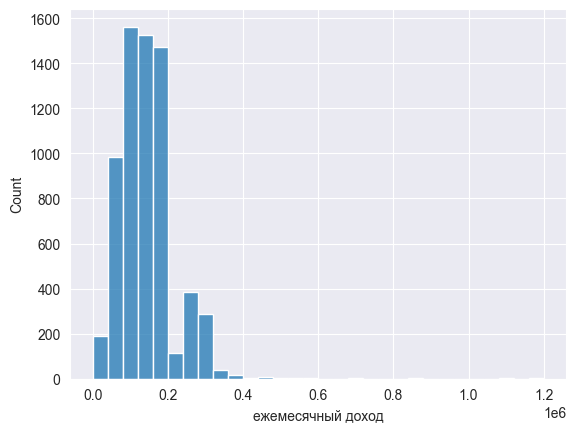

In [233]:
sns.histplot(data=df4, x="ежемесячный доход", bins=30)

In [187]:
df4_1=df4[(df4[ 'решение банка A'] != 1) & (df4[ 'решение банка A'] != 1) &  (df4[ 'решение банка C'] != 1) & (df4[ 'решение банка D'] != 1) & (df4[ 'решение банка E'] != 1)]

In [195]:
t=[ 'решение банка A',  'решение банка B',  'решение банка C',  'решение банка D',  'решение банка E']

In [201]:
df5=df4_1[['пол', 'СНИЛС', 'кол-во детей',  'стаж работы код', 'имеет доход','кредит возможен', 'решение банка A']]
df5_1=df4_1[['пол', 'СНИЛС', 'кол-во детей', 'категория товара код', 'семейное положение код', 'образование код', 'тип занятости код', 'стаж работы код', 'срок кредита код', 'имеет доход','кредит возможен','ежемесячный доход','ежемесячный расход', 'сумма заказа','кредитная нагрузка','возраст','последний стаж код']+t]

In [204]:
# df4[columns+['решение банка A']].corr()['решение банка A'].sort_values()
df5_1.corr()[t].sort_values(by=t[1])

,решение банка A,решение банка B,решение банка C,решение банка D,решение банка E
тип занятости код,-0.007407,-0.027217,0.000199,-0.016171,0.018706
сумма заказа,0.007447,-0.014405,-0.002337,0.010101,-0.008989
решение банка D,-0.000628,-0.013196,0.010077,1.000000,0.002246
ежемесячный доход,0.007833,-0.013172,-0.012500,0.014077,0.006110
срок кредита код,0.001328,-0.012860,-0.010406,0.007286,-0.010077
категория товара код,0.000073,-0.012393,-0.017919,0.004339,0.015091
последний стаж код,0.014098,-0.005559,0.006198,-0.003614,-0.006213
стаж работы код,0.014098,-0.005559,0.006198,-0.003614,-0.006213
решение банка E,0.003500,0.002026,0.003000,0.002246,1.000000
семейное положение код,-0.004134,0.002967,-0.000425,-0.016182,0.008727


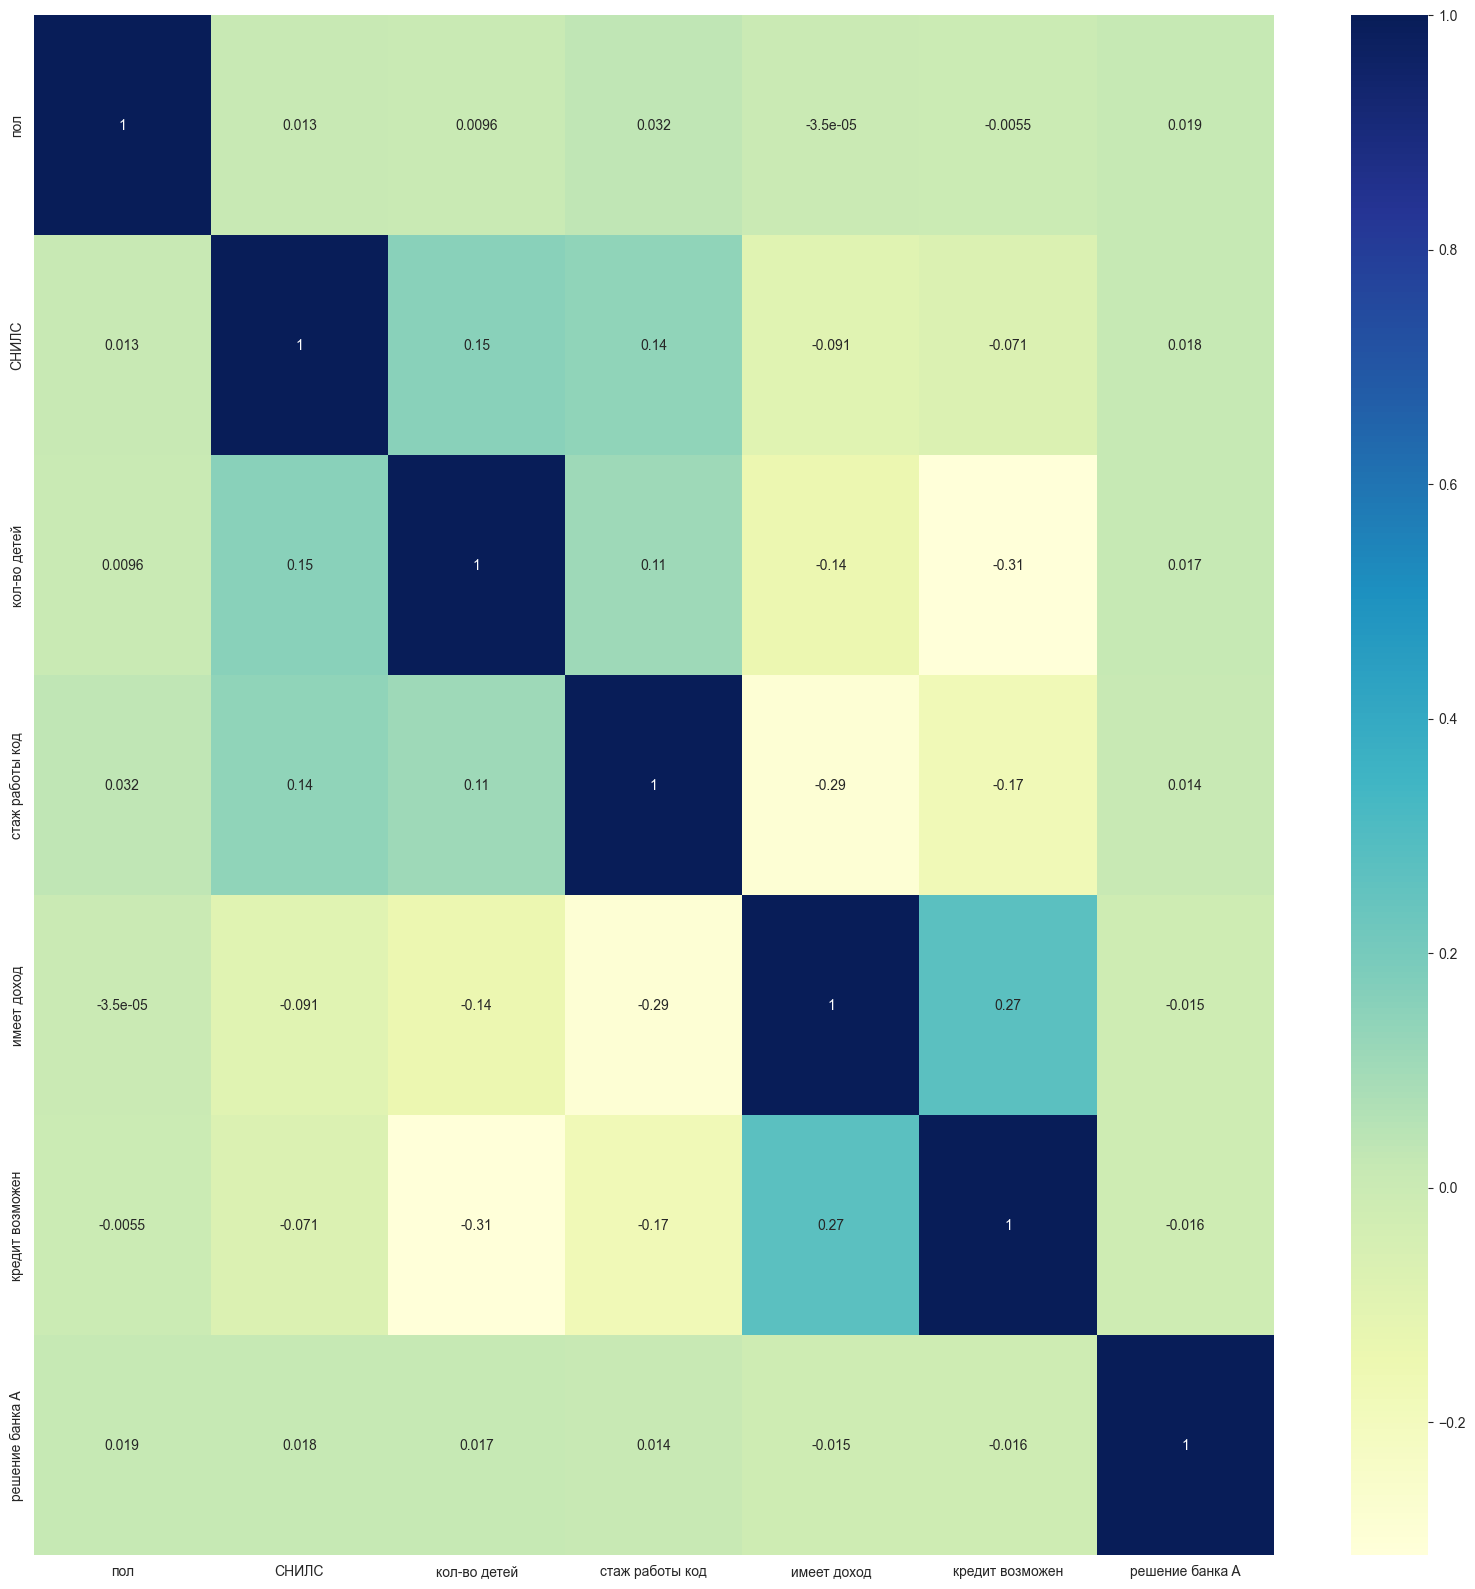

In [145]:
plt.figure(figsize=(20,20))
dataplot = sns.heatmap(df5.corr(), cmap="YlGnBu", annot=True)

# displaying heatmap
plt.show()

<Axes: xlabel='кредитная нагрузка', ylabel='решение банка A'>

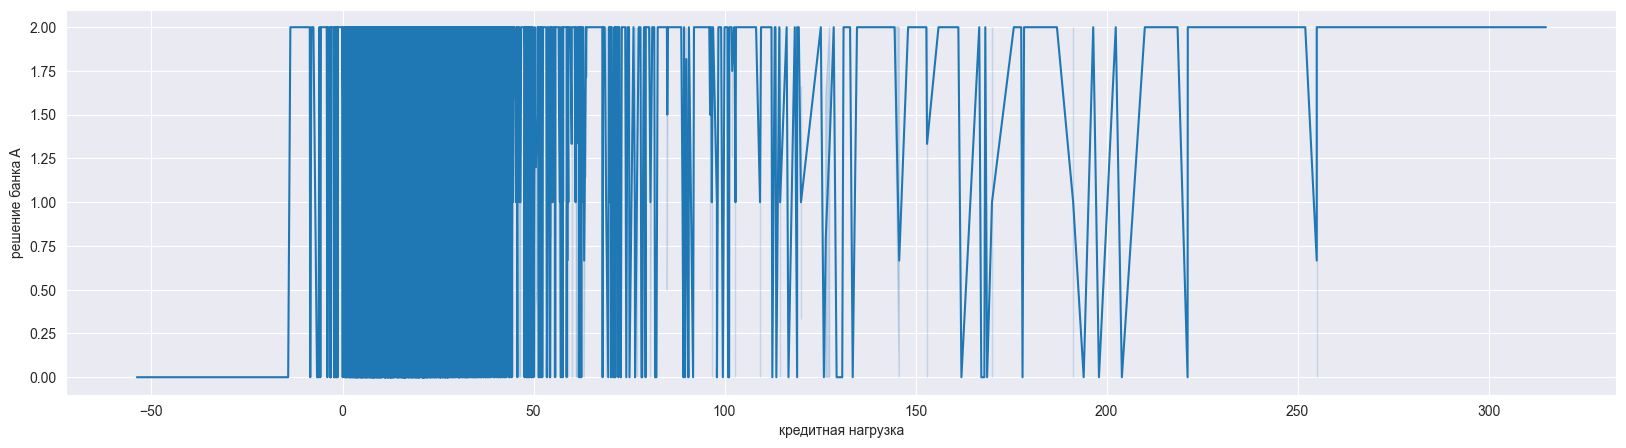

In [157]:
plt.figure(figsize=(20,5))
sns.lineplot(data=df4_1[(df4_1["кредитная нагрузка"]>-1200) & (df4_1["кредитная нагрузка"]<1200)], x="кредитная нагрузка", y="решение банка A")


/tmp/ipykernel_1674864/4267214674.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  myplot.set_xticklabels(myplot.get_xticklabels(), rotation=45,


[Text(0, 0, '0'), Text(1, 0, '2')]

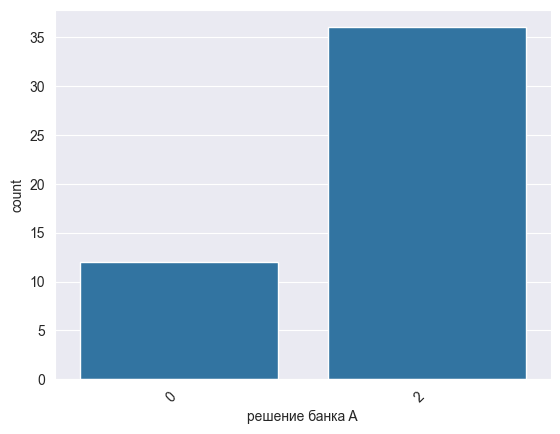

In [211]:
plt.figure()
myplot=sns.countplot(df4_1[df4_1["кредитная нагрузка"]<-2], x= 'решение банка A')
myplot.set_xticklabels(myplot.get_xticklabels(), rotation=45,
                    horizontalalignment='right')

In [44]:
dfn=df4[df4["кредитная нагрузка"]<5]


In [59]:
ss=df4.groupby( 'категория товара')["решение банка A"].value_counts()

In [ ]:
df5_B_1=df4[['пол', 'СНИЛС', 'кол-во детей', 'имеет доход','кредит возможен', 'ежемесячный доход', 'решение банка B']]
plt.figure(figsize=(20,20))
dataplot = sns.heatmap(df5_B_1.corr(), cmap="YlGnBu", annot=True)

# displaying heatmap
plt.show()

In [213]:
cols = [col for col in df4.columns if 'стаж_' in col]
# df4_1[cols +['решение банка B']].corr()['решение банка B'].sort_values()
df4_1[cols +t].corr()[t].sort_values(by=t[0])
# plt.figure(figsize=(20,20))
# dataplot = sns.heatmap(df5_B.corr(), cmap="YlGnBu", annot=True)
#
# # displaying heatmap
# plt.show()

,решение банка A,решение банка B,решение банка C,решение банка D,решение банка E
последний стаж_1 - 2 года,-0.021241,-0.007009,-0.004381,-0.003448,-0.004438
общий стаж_5 - 6 лет,-0.019811,0.008567,0.000225,-0.015709,0.002359
последний стаж_7 - 8 лет,-0.015067,0.007445,-0.005471,-0.012547,-0.006195
общий стаж_7 - 8 лет,-0.014966,0.005318,0.019021,-0.016588,-0.014460
последний стаж_менее 4 месяцев,-0.013698,0.001781,-0.001820,-0.008226,0.007693
...,...,...,...,...,...
общий стаж_9 - 10 лет,0.018098,-0.000669,0.005099,-0.005862,-0.005815
последний стаж_6 месяцев - 1 год,0.023550,0.010043,0.005075,-0.001874,0.012797
общий стаж_Нет стажа,0.023778,-0.006886,-0.015187,0.017153,0.003520
общий стаж_2 - 3 года,0.024529,-0.005584,-0.025371,0.003037,0.010049


In [214]:
cols = [col for col in df4.columns if 'образование_' in col]
df4_1[cols +t].corr()[t].sort_values(by=t[0])

,решение банка A,решение банка B,решение банка C,решение банка D,решение банка E
образование_Среднее профессиональное,-0.022509,0.011545,0.001257,-0.007343,-0.008692
образование_Магистр,-0.016011,-0.010765,0.010710,-0.001508,0.012776
образование_Несколько высших,-0.011887,-0.000533,-0.015103,-0.005866,0.008461
образование_Высшее - специалист,-0.004850,-0.010686,0.004962,0.001510,-0.004260
образование_MBA,-0.004801,-0.004063,-0.021204,-0.004746,0.012253
решение банка D,-0.000628,-0.013196,0.010077,1.000000,0.002246
решение банка E,0.003500,0.002026,0.003000,0.002246,1.000000
образование_Ученая степень,0.007052,0.007372,0.007199,0.007070,0.007073
решение банка C,0.007926,0.031016,1.000000,0.010077,0.003000
образование_Неоконченное среднее,0.009489,0.011488,-0.011527,-0.007097,0.015219


In [215]:
cols = [col for col in df4.columns if 'образование_' in col]
df4_1[cols +t].corr()[t].sort_values(by=t[0])

,решение банка A,решение банка B,решение банка C,решение банка D,решение банка E
образование_Среднее профессиональное,-0.022509,0.011545,0.001257,-0.007343,-0.008692
образование_Магистр,-0.016011,-0.010765,0.010710,-0.001508,0.012776
образование_Несколько высших,-0.011887,-0.000533,-0.015103,-0.005866,0.008461
образование_Высшее - специалист,-0.004850,-0.010686,0.004962,0.001510,-0.004260
образование_MBA,-0.004801,-0.004063,-0.021204,-0.004746,0.012253
решение банка D,-0.000628,-0.013196,0.010077,1.000000,0.002246
решение банка E,0.003500,0.002026,0.003000,0.002246,1.000000
образование_Ученая степень,0.007052,0.007372,0.007199,0.007070,0.007073
решение банка C,0.007926,0.031016,1.000000,0.010077,0.003000
образование_Неоконченное среднее,0.009489,0.011488,-0.011527,-0.007097,0.015219


In [216]:
cols = [col for col in df4.columns if 'cемейное положение_' in col]
df4_1[cols +t].corr()[t].sort_values(by=t[0])

,решение банка A,решение банка B,решение банка C,решение банка D,решение банка E
cемейное положение_Женат / замужем,-0.008818,-0.000583,0.002485,0.016346,-0.029593
cемейное положение_Разведён / Разведена,-0.002455,0.001533,0.001122,0.015186,-0.001722
решение банка D,-0.000628,-0.013196,0.010077,1.000000,0.002246
решение банка E,0.003500,0.002026,0.003000,0.002246,1.000000
cемейное положение_Никогда в браке не состоял(а),0.003744,0.001296,-0.001311,-0.031080,0.021773
cемейное положение_Вдовец / вдова,0.005379,0.003779,0.011113,-0.003053,0.014209
решение банка C,0.007926,0.031016,1.000000,0.010077,0.003000
решение банка B,0.010421,1.000000,0.031016,-0.013196,0.002026
cемейное положение_Гражданский брак / совместное проживание,0.016984,-0.008754,-0.013465,0.032145,0.011323
решение банка A,1.000000,0.010421,0.007926,-0.000628,0.003500


In [217]:
cols = [col for col in df4.columns if 'cрок кредита_' in col]
df4_1[cols +t].corr()[t].sort_values(by=t[0])

,решение банка A,решение банка B,решение банка C,решение банка D,решение банка E
cрок кредита_12,-0.016799,0.001785,-0.002969,-0.003597,-0.019345
решение банка D,-0.000628,-0.013196,0.010077,1.000000,0.002246
cрок кредита_18,0.001309,0.021748,-0.014426,0.017404,-0.002026
решение банка E,0.003500,0.002026,0.003000,0.002246,1.000000
решение банка C,0.007926,0.031016,1.000000,0.010077,0.003000
cрок кредита_24,0.008614,-0.028661,0.000842,-0.002819,0.000666
cрок кредита_6,0.010041,0.002592,0.012602,-0.006737,0.020439
решение банка B,0.010421,1.000000,0.031016,-0.013196,0.002026
решение банка A,1.000000,0.010421,0.007926,-0.000628,0.003500


In [218]:
cols = [col for col in df4.columns if 'kатегория товара_' in col]
df4_1[cols +t].corr()[t].sort_values(by=t[0])

,решение банка A,решение банка B,решение банка C,решение банка D,решение банка E
kатегория товара_Travel,-0.017956,-0.001157,-0.003237,0.011381,0.030459
kатегория товара_Furniture,-0.013526,-0.002942,-0.011297,-0.009447,0.009560
kатегория товара_Fitness,-0.005979,0.010592,0.016990,0.005525,0.023675
решение банка D,-0.000628,-0.013196,0.010077,1.000000,0.002246
kатегория товара_Education,0.002353,-0.000190,0.014720,0.005375,-0.025312
решение банка E,0.003500,0.002026,0.003000,0.002246,1.000000
kатегория товара_Medical_services,0.007440,0.010318,-0.001131,-0.012776,-0.015788
решение банка C,0.007926,0.031016,1.000000,0.010077,0.003000
kатегория товара_Other,0.008235,-0.033472,-0.010338,0.008038,-0.001473
решение банка B,0.010421,1.000000,0.031016,-0.013196,0.002026


In [219]:
cols = [col for col in df4.columns if 'код магазина_' in col]
df4_1[cols +t].corr()[t].sort_values(by=t[0])

,решение банка A,решение банка B,решение банка C,решение банка D,решение банка E
код магазина_26.0,-0.032041,-0.013632,0.002363,-0.009114,0.010320
код магазина_29.0,-0.030522,0.012468,-0.006312,-0.001943,0.016945
код магазина_19.0,-0.020337,0.016428,-0.001639,0.006593,-0.010021
код магазина_61.0,-0.020192,0.005969,-0.000191,-0.011027,-0.002124
код магазина_79.0,-0.019391,0.009585,0.017991,-0.010268,-0.010218
...,...,...,...,...,...
код магазина_68.0,0.023618,0.022267,0.003135,0.001351,-0.008244
код магазина_10.0,0.025408,0.003101,0.005969,-0.005096,0.022611
код магазина_21.0,0.026218,0.010381,-0.000840,-0.012347,-0.005838
код магазина_3.0,0.027447,0.007115,0.000733,0.018085,0.027707


In [220]:
cols = [col for col in df4.columns if 'занятость_' in col]
df4_1[cols +t].corr()[t].sort_values(by=t[0])

,решение банка A,решение банка B,решение банка C,решение банка D,решение банка E
занятость_Собственное дело,-0.023679,-0.039479,-0.005069,-0.009289,0.024189
занятость_Декретный отпуск,-0.009840,0.005390,0.004627,0.010578,0.010596
решение банка D,-0.000628,-0.013196,0.010077,1.000000,0.002246
занятость_Не работаю,-0.000036,-0.008855,-0.015560,0.024785,-0.006783
занятость_Пенсионер,0.000486,0.009196,0.015556,0.000601,0.014910
решение банка E,0.003500,0.002026,0.003000,0.002246,1.000000
занятость_Работаю по найму неполный рабочий день,0.005189,0.000654,0.010638,-0.009869,-0.002199
решение банка C,0.007926,0.031016,1.000000,0.010077,0.003000
решение банка B,0.010421,1.000000,0.031016,-0.013196,0.002026
занятость_Работаю по найму полный рабочий день/служу,0.018446,0.039130,0.002693,0.000332,-0.027529
